Предполагается, что в рамках данного задания ученики сами будут изучать документацию, как минимум используя функционал `tab` и `shift+tab` от Jupyter

1. Импортируйте библиотеку pandas 
2. Считайте файл `wage.csv` в DataFrame с названием `wage`. Используйте для этого функцию pd.read_csv()

`person_id` - идентификатор человека

`gender` - пол, 0 - женский, 1 - мужской

`wage` - заработная плата в рублях

In [83]:
import pandas as pd

df_wage = pd.read_csv('wage-1-ee13a6b1-605e-44fe-83a6-85d3d7a0b3ae.csv')
df_wage

,person_id,gender,wage
0,0,1,46793.603811
1,1,1,33481.575720
2,2,1,44523.699084
3,3,1,15995.576829
4,4,0,10282.631224
...,...,...,...
1001,995,1,66503.737185
1002,996,1,9972.956272
1003,997,0,104504.616392
1004,998,1,98927.903076


3. Поменяйте колонку `gender` так, чтобы были записи `F` (female) и `M` (male) вместо 0 и 1

In [84]:
df_wage['gender'] = df_wage['gender'].apply(lambda x: 'M' if x == 1 else 'F')
df_wage

,person_id,gender,wage
0,0,M,46793.603811
1,1,M,33481.575720
2,2,M,44523.699084
3,3,M,15995.576829
4,4,F,10282.631224
...,...,...,...
1001,995,M,66503.737185
1002,996,M,9972.956272
1003,997,F,104504.616392
1004,998,M,98927.903076


4. Давайте посчитаем среднюю зарплату у мужчин и женщин. Для этого используйте метод `groupby` со следующим синтаксисом:

`dataframe.groupby(Название_колонки_для_группировки)[Перечисление_колонок_для_агрегации].функция_агрегации()`

In [85]:
df_wage.groupby('gender')['wage'].mean()

#Так же можно вывести через метод describe. Он выведет количество, среднее, стандартное отклонение, мин, макс и квантили 
#df_wage.describe()

gender
F    40855.747261
M    46815.944005
Name: wage, dtype: float64

5. Теперь взглянем внимательнее на данные и обнаружим, что некоторые люди попали в выборку несколько раз. 
    1. Найдите таких людей. Подсказка: `value_counts()`
    0. Убедитесь, что записи по ним с одинаковым `wage`. Возможно, тут вам пригодится функция агрегации `nunique()`, отображающая количество разных значений
    0. Избавьтесь от повторяющихся значений. Подсказка: `drop_duplicates()`

In [86]:
df_wage.value_counts()[0:10] # Видим, что есть клиенты с двумя записями

person_id  gender  wage         
17         M       20178.985060     2
16         F       35448.040878     2
15         F       68341.332163     2
14         M       13434.655493     2
13         M       273483.609236    2
12         M       23547.663281     2
0          M       46793.603811     1
669        F       29221.086671     1
671        F       10248.867587     1
670        F       79168.709378     1
dtype: int64

In [87]:
df_wage.loc[((df_wage['person_id'] > 11) & (df_wage['person_id' ] < 18))]

,person_id,gender,wage
12,12,M,23547.663281
13,12,M,23547.663281
14,13,M,273483.609236
15,13,M,273483.609236
16,14,M,13434.655493
17,14,M,13434.655493
18,15,F,68341.332163
19,15,F,68341.332163
20,16,F,35448.040878
21,16,F,35448.040878


In [88]:
df_wage = df_wage.drop_duplicates()

In [89]:
# Проверяем, что убрали дубли
df_wage.value_counts()

person_id  gender  wage         
0          M       46793.603811     1
671        F       10248.867587     1
658        F       19783.977951     1
659        F       10461.600089     1
660        M       65520.795238     1
                                   ..
338        F       24467.660296     1
339        M       19057.252451     1
340        F       69126.349194     1
341        F       25954.347353     1
999        M       108107.141368    1
Length: 1000, dtype: int64

6. Теперь посмотрим внимательнее на зарплаты
    1. Охарактеризуйте имеющиеся данные по зарплатам. Подсказка: `describe`
    1. Избавьтесь от бессмысленных значений

In [90]:
df_wage.describe()

,person_id,wage
count,1000.000000,1000.000000
mean,499.500000,43694.227404
std,288.819436,55352.539343
min,0.000000,-287418.645743
25%,249.750000,14489.682367
50%,499.500000,27309.529498
75%,749.250000,52021.080258
max,999.000000,755320.874132


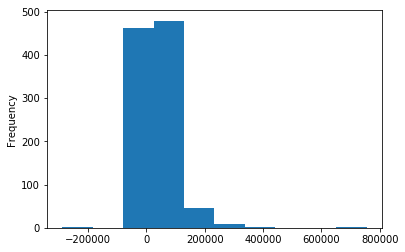

In [91]:
# Видим, что есть отридцательные зарплаты. Давайте посмотрим внимательнее, построив гистаграмму 
df_wage['wage'].plot(kind='hist')

In [92]:
# Таких зарплат не много. Это явно ошибка. Выбросим такие значения
df_wage = df_wage.loc[df_wage['wage'] > 0]
df_wage = df_wage.dropna(subset=['wage']) # ещё на всякий случай удалим с пустыми значениями

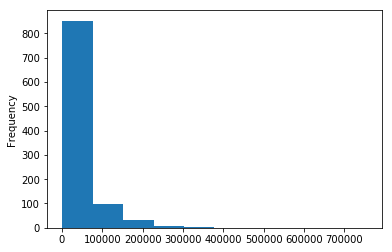

In [93]:
# Проверим, что теперь все хорошо
df_wage['wage'].plot(kind='hist')

7. Давайте теперь посмотрим на зарплату с учетом бонуса. Для этого нам понадобится таблица `bonus.csv`. Считайте ее в переменную `bonus`. Заметьте, что она сохранена немного в другом формате, и вам понадобится уточнить параметр `sep` - разделитель записей. Сравните текущий файл с предыдущим и попробуйте решить проблему

In [94]:
df_bonus = pd.read_csv('bonus-1-c177edc7-6e8e-4e53-8f5d-098bd95cc4de.csv', sep=';')
df_bonus

,person_id,bonus
0,905,85059.638382
1,836,7703.346074
2,287,3120.269742
3,548,5347.987142
4,575,137257.490614
...,...,...
445,488,28102.252903
446,913,55549.347647
447,616,620397.407705
448,110,14086.067488


8. Чтобы посчитать итоговую зарплату, нам нужно по каждому человеку знать и оклад, и премию. Для этого надо будет соединить (сджойнить) таблицы по `person_id`. Используйте для этого функцию `pd.merge`. Помните, что параметр `how` должен быть `'outer'`, чтобы сохранить те записи, что есть только в одной таблице. Результат запишите в новый dataframe `df`

In [95]:
df_full = df_wage.merge(df_bonus, how = 'outer', on = 'person_id')
df_full

,person_id,gender,wage,bonus
0,0,M,46793.603811,3.332934e+04
1,1,M,33481.575720,NaN
2,2,M,44523.699084,3.192912e+06
3,3,M,15995.576829,2.196858e+04
4,4,F,10282.631224,NaN
...,...,...,...,...
994,997,F,104504.616392,5.380978e+04
995,998,M,98927.903076,NaN
996,999,M,108107.141368,NaN
997,43,NaN,NaN,2.687784e+05


9. Наконец, давайте посчитаем итоговую зарплату
    1. Замените отсутствующие записи в колонке `bonus` нулями
    1. Уберите людей без `wage` - это те "плохие" записи, от которых мы избавлялись на предыдущих шагах
    1. Сделайте новую колонку `total`, которая будет равна 12 окладам и премии
    1. Посчитайте среднюю и медианную итоговую зарплату в разрезе по полу. Подсказка: вместо функции агрегации можно написать `.agg()` и перечислить внутри нужные агрегаты

In [96]:
df_full = df_full.fillna(0)
df_full.head(5)

,person_id,gender,wage,bonus
0,0,M,46793.603811,3.332934e+04
1,1,M,33481.575720,0.000000e+00
2,2,M,44523.699084,3.192912e+06
3,3,M,15995.576829,2.196858e+04
4,4,F,10282.631224,0.000000e+00


In [97]:
df_full['total'] = 12 * df_full['wage'] + df_full['bonus']
df_full.head(5)

,person_id,gender,wage,bonus,total
0,0,M,46793.603811,3.332934e+04,5.948526e+05
1,1,M,33481.575720,0.000000e+00,4.017789e+05
2,2,M,44523.699084,3.192912e+06,3.727197e+06
3,3,M,15995.576829,2.196858e+04,2.139155e+05
4,4,F,10282.631224,0.000000e+00,1.233916e+05


In [98]:
df_full.groupby('gender').agg({'total':['mean','median']})

total               
                 mean         median
gender                              
0       142936.832502  142936.832502
F       570746.139432  347622.913892
M       657142.490282  437499.824868

10. Сохраните `df` в файл, используя метод `to_csv()`. Не записывайте индексы

In [ ]:
df_full.to_csv('total_wage.csv', index = False)